In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import tensorflow as tf
import math
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
data_path = 'data/'

In [3]:
diagnosed_data = pd.read_csv(data_path + '22_COMB_diag_hotData.csv', low_memory=False)
diagnosed_col = pd.read_csv(data_path + '22_COMB_diag_col.csv', low_memory=False)

if 'Unnamed: 0' in list(diagnosed_col):
	diagnosed_col = diagnosed_col.drop('Unnamed: 0',axis=1,errors='ignore')

assert (diagnosed_data.shape[0] == diagnosed_col.shape[0])
split_index = int(diagnosed_data.shape[0] * 0.85)

print('   ')
print('Splitting train and test data in ratio 85:15')
train_data = np.array(diagnosed_data.astype(float))[:split_index]
train_label = np.array(diagnosed_col.astype(float))[:split_index][:,0]

test_data = np.array(diagnosed_data.astype(float))[split_index:]
test_label = np.array(diagnosed_col.astype(float))[split_index:][:,0]

   
Splitting train and test data in ratio 85:15


In [4]:
def get_frequency(dataframe, colname, single_col_df=False) :
    # Get the specific column for which we need frequency
    if not single_col_df :
        dataframe = dataframe[[colname]]
    # Get the frequency in unsorted manner
    value_df = dataframe.apply(pd.value_counts)
    # Sort it
    sorted_values = pd.DataFrame.sort(value_df)
    return (sorted_values)

/Users/himanshubabal/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(....) is deprecated, use sort_index(.....)


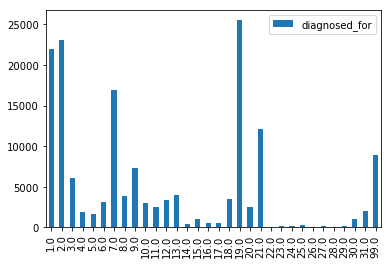

In [5]:
fig, ax = plt.subplots()
get_frequency(diagnosed_col, 'diagnosed_for').plot(ax=ax, kind='bar')
plt.show()

In [6]:
# To predict -> 1,2,3,7,9,19,21,99

In [7]:
pred_list = [1.0,2.0,3.0,7.0,9.0,19.0,21.0,99.0]
new_list = [1,2,3,4,5,6,7,8]

In [8]:

# Replace Label No 99 by 32
# Label No 99 causes 'to_categorical' to make 100 one-hot values
# Replacing it by 33 leads to only 33 values
def replace_99_labes(label_data):
    for i in range(len(label_data)):
        e = label_data[i]
        if e in pred_list:
            ind = pred_list.index(label_data[i])
            new_element = new_list[ind]
            label_data[i] = new_element
        else:
            label_data[i] = 0
# 		if label_data[i] == 99.0 :
# 			label_data[i] = 32.0
    return label_data

train_rep = replace_99_labes(train_label)
test_rep = replace_99_labes(test_label)

In [9]:
train_label = to_categorical(train_rep.astype('int32'), nb_classes=None)
test_label = to_categorical(test_rep.astype('int32'), nb_classes=None)

In [14]:
test_label.shape

(23706, 9)

In [10]:
# Fully-Connected Neural network with 4 Hidden layers
model = Sequential()
# Input Layer
model.add(Dense(50, input_dim=test_data.shape[1], init='uniform'))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# Hidden Layer - 1

model.add(Dense(200, init='uniform'))
model.add(Activation('relu'))

model.add(Dense(400, init='uniform'))
model.add(Activation('relu'))

model.add(Dense(750, init='uniform'))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# Hidden Layer - 2
model.add(Dense(500, init='uniform'))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# Hidden Layer - 3
model.add(Dense(250, init='uniform'))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
# Hidden Layer - 4
model.add(Dense(100, init='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
# Output Layer
model.add(Dense(test_label.shape[1], init='uniform'))
model.add(Activation('softmax'))

In [11]:
sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [13]:
model.fit(train_data, train_label,
          nb_epoch=20,
          batch_size=128)


Epoch 1/20
 13824/134330 [==>...........................] - ETA: 94s - loss: 12.4686 - acc: 0.2215 

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_data, to_categorical(test_label.astype('int32'), nb_classes=None))